In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics

In [2]:
df = pd.read_csv('sample_data/Wholesale customers data.csv')

In [3]:
df.shape

(440, 8)

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


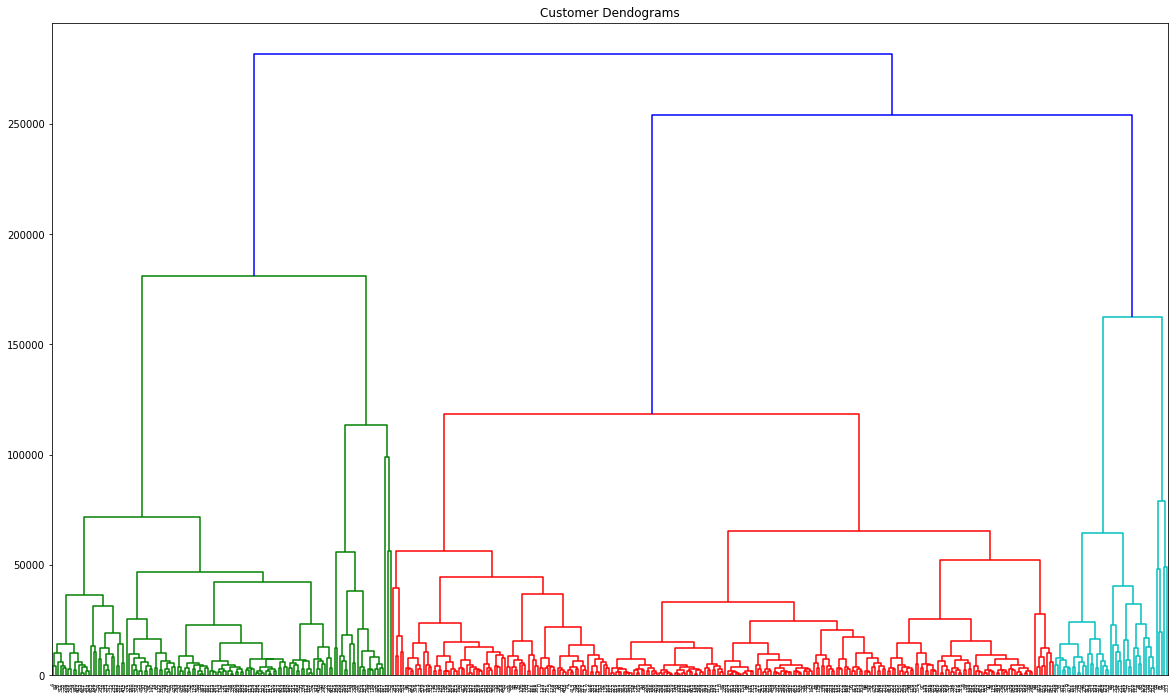

In [7]:
plt.figure(figsize=(20, 12))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

با کشیدن یک خط افقی روی ارتفاع 150000 داده ها را به 5 کلاستر تقسیم میکنم با استفاده از این روش

In [16]:
sil = {}
for i in range(2, 11):
  cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
  labels = cluster.fit_predict(df)
  sil[i] = sklearn.metrics.silhouette_score(df, labels)

<BarContainer object of 9 artists>

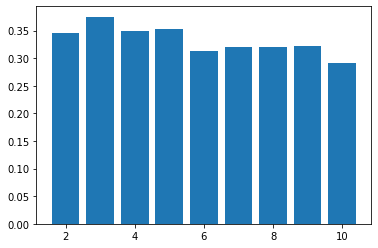

In [17]:
plt.bar(sil.keys(), sil.values())

<div dir="rtl">

برای مطالعه فاصله جدایی بین خوشه های حاصل می توان از تحلیل Silhouette استفاده کرد. نمودار silhouette اندازه ای از نزدیک بودن هر نقطه در یک خوشه به نقاط در خوشه های همسایه را نشان می دهد و بنابراین راهی برای ارزیابی پارامترهایی مانند تعداد خوشه ها به صورت بصری ارائه می دهد. این اندازه گیری دارای محدوده [-1، 1] است.

ضرایب Silhouette (همانطور که این مقادیر به عنوان خوانده می شوند) نزدیک به +1 نشان می دهد که نمونه از خوشه های همسایه دور است. مقدار 0 نشان می دهد که نمونه روی مرز تصمیم بین دو خوشه همسایه یا بسیار نزدیک به آن است و مقادیر منفی نشان می دهد که آن نمونه ها ممکن است به خوشه اشتباهی اختصاص داده شده باشند.

</div>

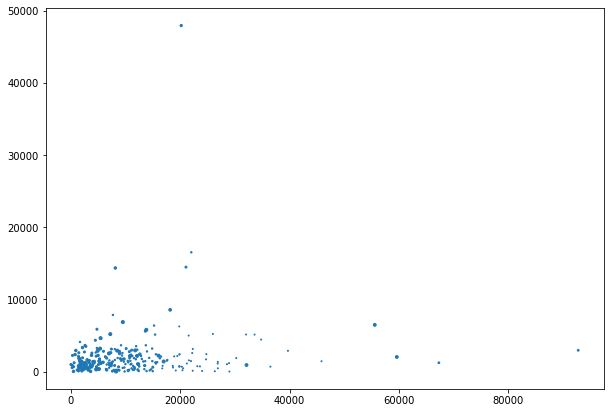

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Grocery'], df['Delicassen'], labels, cmap='rainbow')

In [ ]:
df[labels==0].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,1.051429,2.508571,5740.308571,2512.697143,3049.702857,2954.068571,739.011429,884.005714
std,0.221504,0.801354,3864.338418,1992.258825,1930.859746,4101.429101,980.190024,878.603630
min,1.000000,1.000000,3.000000,55.000000,137.000000,47.000000,5.000000,3.000000
25%,1.000000,2.000000,2395.000000,1037.000000,1639.500000,660.500000,185.500000,306.500000
50%,1.000000,3.000000,5567.000000,1931.000000,2500.000000,1483.000000,355.000000,659.000000
75%,1.000000,3.000000,8973.000000,3327.500000,4275.000000,3573.000000,845.500000,1123.500000
max,2.000000,3.000000,14039.000000,10678.000000,8335.000000,35009.000000,5316.000000,5137.000000


In [ ]:
df[labels==1].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,2.0,2.450000,4705.475000,14468.625000,24798.475000,1526.050000,11265.700000,1728.800000
std,0.0,0.814925,4742.297982,7010.029828,6505.949128,1407.983627,4645.588336,1678.288891
min,2.0,1.000000,37.000000,1275.000000,16709.000000,33.000000,836.000000,3.000000
25%,2.0,2.000000,995.250000,9973.750000,20173.000000,642.500000,7801.750000,637.750000
50%,2.0,3.000000,4105.500000,13278.000000,22710.500000,1158.500000,10768.000000,1137.000000
75%,2.0,3.000000,6038.000000,17667.750000,27287.500000,1881.250000,13618.750000,2217.250000
max,2.0,3.000000,22039.000000,29892.000000,45828.000000,6746.000000,24231.000000,6250.000000


In [ ]:
df[labels==2].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,1.755814,2.604651,5859.639535,8726.302326,11175.837209,1600.883721,4602.755814,1720.058140
std,0.432123,0.740096,4700.280998,5002.820268,3658.184448,1769.455565,2246.100474,2121.546641
min,1.000000,1.000000,18.000000,2495.000000,1660.000000,25.000000,20.000000,3.000000
25%,2.000000,3.000000,2378.250000,6066.500000,8931.500000,409.250000,3335.250000,452.250000
50%,2.000000,3.000000,4757.000000,7621.000000,10958.500000,963.500000,4466.000000,1389.500000
75%,2.000000,3.000000,8745.250000,10338.000000,13581.250000,2125.500000,6493.750000,2079.750000
max,2.000000,3.000000,26373.000000,36423.000000,22019.000000,10155.000000,10069.000000,16523.000000


In [ ]:
df[labels==3].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,2.0,2.000000,2.000000,2.0000,2.000000,2.000000,2.000000,2.000000
mean,2.0,2.500000,12341.000000,25588.5000,80039.000000,578.500000,39464.500000,2079.500000
std,0.0,0.707107,5340.070412,29144.8202,18018.494998,632.860569,1926.865979,1222.587625
min,2.0,2.000000,8565.000000,4980.0000,67298.000000,131.000000,38102.000000,1215.000000
25%,2.0,2.250000,10453.000000,15284.2500,73668.500000,354.750000,38783.250000,1647.250000
50%,2.0,2.500000,12341.000000,25588.5000,80039.000000,578.500000,39464.500000,2079.500000
75%,2.0,2.750000,14229.000000,35892.7500,86409.500000,802.250000,40145.750000,2511.750000
max,2.0,3.000000,16117.000000,46197.0000,92780.000000,1026.000000,40827.000000,2944.000000


In [ ]:
df[labels==4].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,1.182927,2.560976,18307.512195,2814.731707,4366.804878,3575.926829,1048.719512,1477.256098
std,0.388986,0.755189,3488.988082,1941.980795,3839.410717,3399.385637,1296.145894,1816.932280
min,1.000000,1.000000,12212.000000,134.000000,3.000000,118.000000,3.000000,57.000000
25%,1.000000,2.000000,15952.000000,1275.500000,1822.000000,994.250000,214.250000,561.500000
50%,1.000000,3.000000,17908.500000,2069.500000,2979.500000,2243.500000,475.500000,929.000000
75%,1.000000,3.000000,20324.750000,4267.500000,5774.500000,4577.250000,1448.000000,1890.000000
max,2.000000,3.000000,31276.000000,7243.000000,21042.000000,13223.000000,6707.000000,14472.000000


In [ ]:
df[labels==5].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,2.0,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,1.0,2.500000,34782.000000,30367.000000,16898.000000,48701.50000,755.500000,26776.000000
std,0.0,0.707107,2920.351006,19209.262818,4627.306776,17207.44352,730.441305,29934.658475
min,1.0,2.000000,32717.000000,16784.000000,13626.000000,36534.00000,239.000000,5609.000000
25%,1.0,2.250000,33749.500000,23575.500000,15262.000000,42617.75000,497.250000,16192.500000
50%,1.0,2.500000,34782.000000,30367.000000,16898.000000,48701.50000,755.500000,26776.000000
75%,1.0,2.750000,35814.500000,37158.500000,18534.000000,54785.25000,1013.750000,37359.500000
max,1.0,3.000000,36847.000000,43950.000000,20170.000000,60869.00000,1272.000000,47943.000000


In [ ]:
df[labels==6].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,20.000000,20.000000,20.000000,20.00000,20.00000,20.000000,20.000000,20.00000
mean,1.100000,2.700000,47595.300000,3053.20000,4427.50000,5498.200000,794.600000,2217.15000
std,0.307794,0.732695,10716.828366,1772.07237,3217.83349,4888.252067,637.309179,3003.72867
min,1.000000,1.000000,36050.000000,286.00000,471.00000,532.000000,32.000000,18.00000
25%,1.000000,3.000000,40110.250000,1589.25000,1970.50000,1382.000000,360.500000,894.25000
50%,1.000000,3.000000,43176.500000,3313.50000,3689.50000,4794.500000,740.500000,1720.00000
75%,1.000000,3.000000,53924.250000,4076.50000,6677.50000,6658.500000,1057.500000,2361.00000
max,2.000000,3.000000,76237.000000,6958.00000,12609.00000,18028.000000,2587.000000,14351.00000


In [ ]:
df[labels==7].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1.0,3.0,112151.0,29627.0,18148.0,16745.0,4948.0,8550.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,3.0,112151.0,29627.0,18148.0,16745.0,4948.0,8550.0
25%,1.0,3.0,112151.0,29627.0,18148.0,16745.0,4948.0,8550.0
50%,1.0,3.0,112151.0,29627.0,18148.0,16745.0,4948.0,8550.0
75%,1.0,3.0,112151.0,29627.0,18148.0,16745.0,4948.0,8550.0
max,1.0,3.0,112151.0,29627.0,18148.0,16745.0,4948.0,8550.0


In [ ]:
df[labels==8].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,3.0,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,2.0,3.0,34444.333333,55375.333333,49094.333333,4007.666667,23647.333333,3128.333333
std,0.0,0.0,10848.314354,17591.086104,14842.606656,3459.626618,3346.372713,2942.831516
min,2.0,3.0,22925.000000,38369.000000,32114.000000,987.000000,20070.000000,903.000000
25%,2.0,3.0,29433.500000,46314.000000,43842.500000,2120.500000,22120.500000,1460.000000
50%,2.0,3.0,35942.000000,54259.000000,55571.000000,3254.000000,24171.000000,2017.000000
75%,2.0,3.0,40204.000000,63878.500000,57584.500000,5518.000000,25436.000000,4241.000000
max,2.0,3.0,44466.000000,73498.000000,59598.000000,7782.000000,26701.000000,6465.000000


In [ ]:
df[labels==9].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,1.206897,2.482759,28295.758621,6272.137931,7098.965517,3636.275862,1167.172414,2001.413793
std,0.412251,0.828971,3351.988841,4320.940380,4315.088838,4501.375352,1583.009274,1740.289539
min,1.000000,1.000000,22615.000000,489.000000,1495.000000,127.000000,10.000000,3.000000
25%,1.000000,2.000000,25962.000000,2335.000000,4172.000000,800.000000,204.000000,1022.000000
50%,1.000000,3.000000,27901.000000,5410.000000,5429.000000,2540.000000,439.000000,1391.000000
75%,1.000000,3.000000,30379.000000,9465.000000,9490.000000,3881.000000,948.000000,2876.000000
max,2.000000,3.000000,37036.000000,16687.000000,16966.000000,18711.000000,5058.000000,6854.000000


In [11]:
df.shape

(440, 8)

In [14]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')